# Lanes

The purpose of this notebook is to perform different lane specific investigations

In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=13)

C:\Users\Isabelle\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
stations = ['Ceneri', 'Denges', 'Gotthard']

In [3]:
def trucks_per_lane(station):
    df = pd.read_pickle('{}Data/2011_2019_datetime.pkl'.format(station))
    
    df['Weekday'] = df.Date.dt.weekday
    df['Date_d'] = df.Date.dt.date
    
    #Filter to only week days
    df = df[~df.Weekday.isin([5,6])]
    
    df = df.groupby('FS').agg({'Date': 'count', 'Date_d': lambda x: x.nunique()})
    df['norm'] = df['Date']/df['Date_d']
    
    ax = df.plot.bar(y='norm', title='{} Weekday Daily Vehicle Count Average per Lane'.format(station), legend=False)
    ax.set_xlabel('Lane')
    ax.set_ylabel('Average vehicle count')
    
    ax.get_figure().savefig('Figures/{}/daily_count_lane.png'.format(station), bbox_inches='tight')
    
    plt.show()

In [4]:
def weight_per_lane(station):
    df = pd.read_pickle('{}Data/2011_2019_datetime.pkl'.format(station))
    
    df['Weekday'] = df.Date.dt.weekday
    df['GW_TOT'] = df.GW_TOT/1000
    
    #Filter to only week days
    df = df[~df.Weekday.isin([5,6])]
    
    df = df.groupby('FS').agg({'GW_TOT': 'mean'})
    
    ax = df.plot.bar(y='GW_TOT', title='{} Average Vehicle Weight per Lane'.format(station), legend=False)
    ax.set_xlabel('Lane')
    ax.set_ylabel('Average vehicle weight (tons)')
    
    ax.get_figure().savefig('Figures/{}/weight_per_lane.png'.format(station), bbox_inches='tight')

    plt.show()

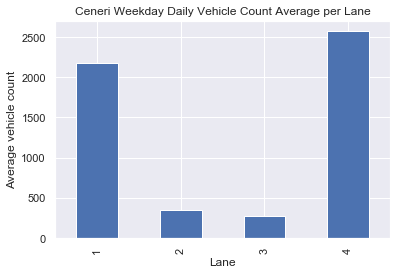

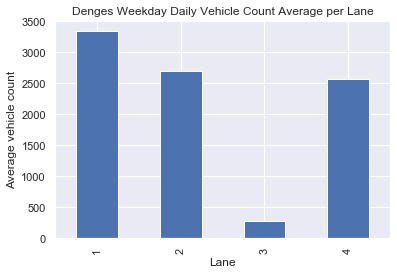

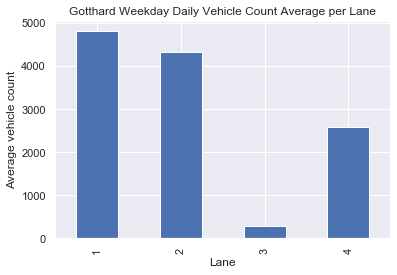

In [5]:
for station in stations:
    trucks_per_lane(station)

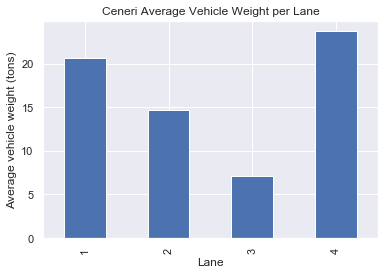

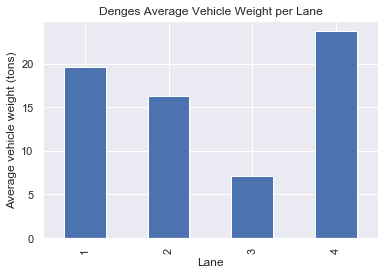

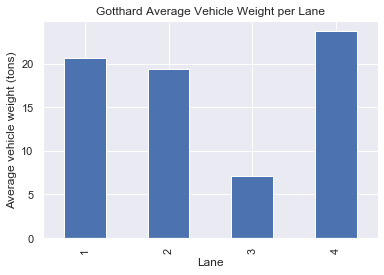

In [6]:
for station in stations:
    weight_per_lane(station)